## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

 


###  Read Data

In [2]:
file_path = 'US_Accidents_part1.csv'   
df = pd.read_csv(file_path)

df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


#### Filtering and Dropping Columns

In [3]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print('[')
for col in df.columns:
    val = df[col].unique()
    if len(val) > 5 and col not in numerical_cols:
        print(f" \'{col}\'," )
print(']')


[
 'ID',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
]


In [4]:
df = df.drop(columns=[
 'ID',
 'Start_Time',
 'End_Time',
 'End_Lng',  
 'End_Lat',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
], axis=1)


<Figure size 1000x700 with 0 Axes>

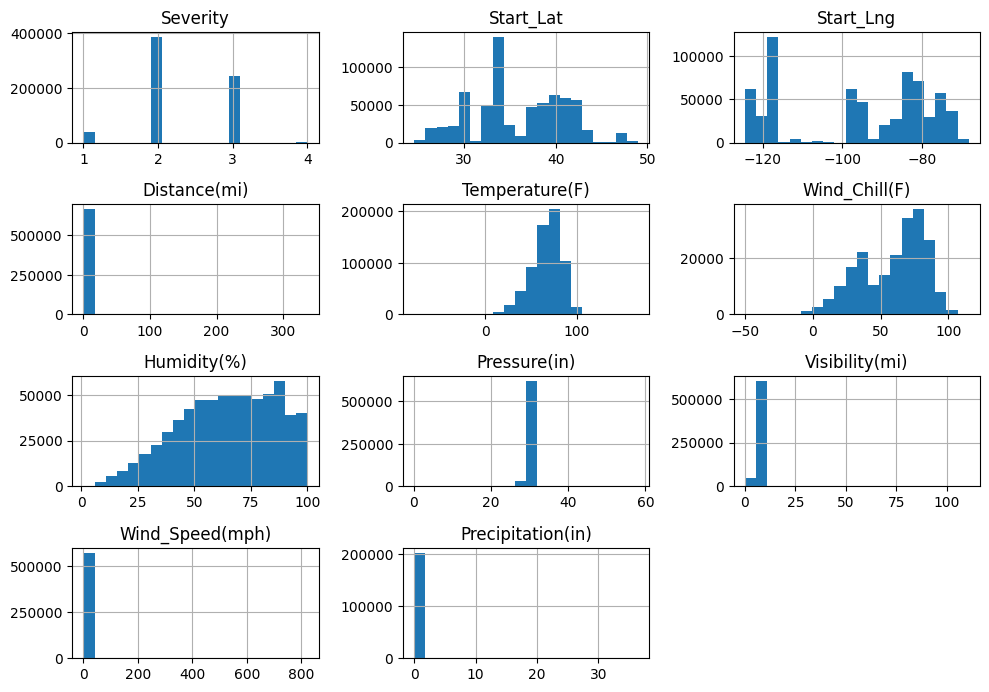

In [5]:
def plot(data):
    plt.figure(figsize=(10 , 7))
    data.hist(bins=20, figsize=(10, 7))
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Call the function to plot histograms for the data after handling missing values
plot(df)


## handle_missing_values

In [6]:
before = df.isnull().sum()
before

Source                        0
Severity                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Country                       0
Timezone                    189
Temperature(F)            10292
Wind_Chill(F)            453788
Humidity(%)               11236
Pressure(in)               8025
Visibility(mi)            13485
Wind_Speed(mph)           94206
Precipitation(in)        463979
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop                  0
Sunrise_Sunset             1212
Civil_Twilight             1212
Nautical_Twilight          1212
Astronomical_Twilight      1212
dtype: i

In [7]:
 
def handle_missing_values(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].median())
    
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df[col].isnull().any():
            df[col] = df[col].fillna(df[col].mode()[0])
    
    return df 

# Apply missing values handling function to each dataset
df = handle_missing_values(df)

In [8]:
after = df.isnull().sum() 
after

Source                   0
Severity                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Country                  0
Timezone                 0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Speed(mph)          0
Precipitation(in)        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

<Figure size 1000x700 with 0 Axes>

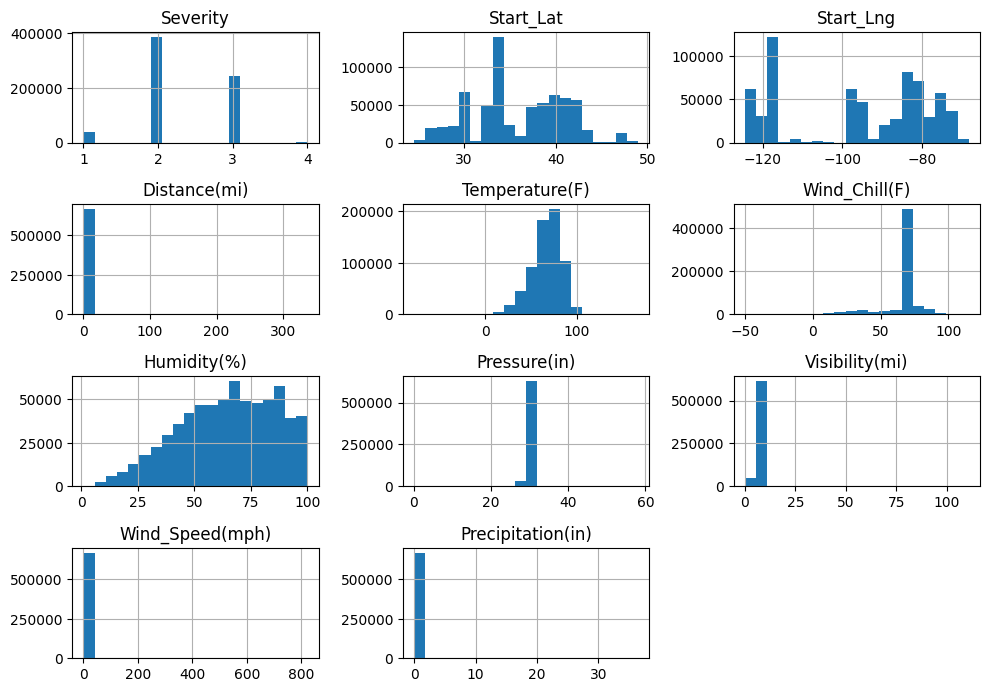

In [9]:
import matplotlib.pyplot as plt

# Plot   after handling missing values
def plot_data_after_missing_values(data):
    plt.figure(figsize=(10 , 7))
    data.hist(bins=20, figsize=(10, 7))
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Call the function to plot histograms for the data after handling missing values
plot_data_after_missing_values(df)


### encode_categorical_data 

In [10]:
one_hot_cols = []
for col in df.columns:
    val = df[col].unique()
    if len(val) <= 5 and col not in numerical_cols:
        one_hot_cols.append(col)        

In [11]:
def encode_categorical_data(df):
    
    df_encoded = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)
    df_encoded = df_encoded.astype(int)
    
    if df_encoded.shape[1] == 1:
        return df_encoded.iloc[:, 0]
    return df_encoded

df = encode_categorical_data(df)



In [12]:
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),...,Railway_True,Roundabout_True,Station_True,Stop_True,Traffic_Calming_True,Traffic_Signal_True,Sunrise_Sunset_Night,Civil_Twilight_Night,Nautical_Twilight_Night,Astronomical_Twilight_Night
0,3,39,-84,0,36,66,91,29,10,8,...,0,0,0,0,0,0,1,1,1,1
1,2,39,-82,0,37,66,100,29,10,8,...,0,0,0,0,0,0,1,1,1,0
2,2,39,-84,0,36,33,100,29,10,3,...,0,0,0,0,0,1,1,1,0,0
3,3,39,-84,0,35,31,96,29,9,4,...,0,0,0,0,0,0,1,0,0,0
4,2,39,-84,0,36,33,89,29,6,3,...,0,0,0,0,0,1,0,0,0,0


<Figure size 1000x700 with 0 Axes>

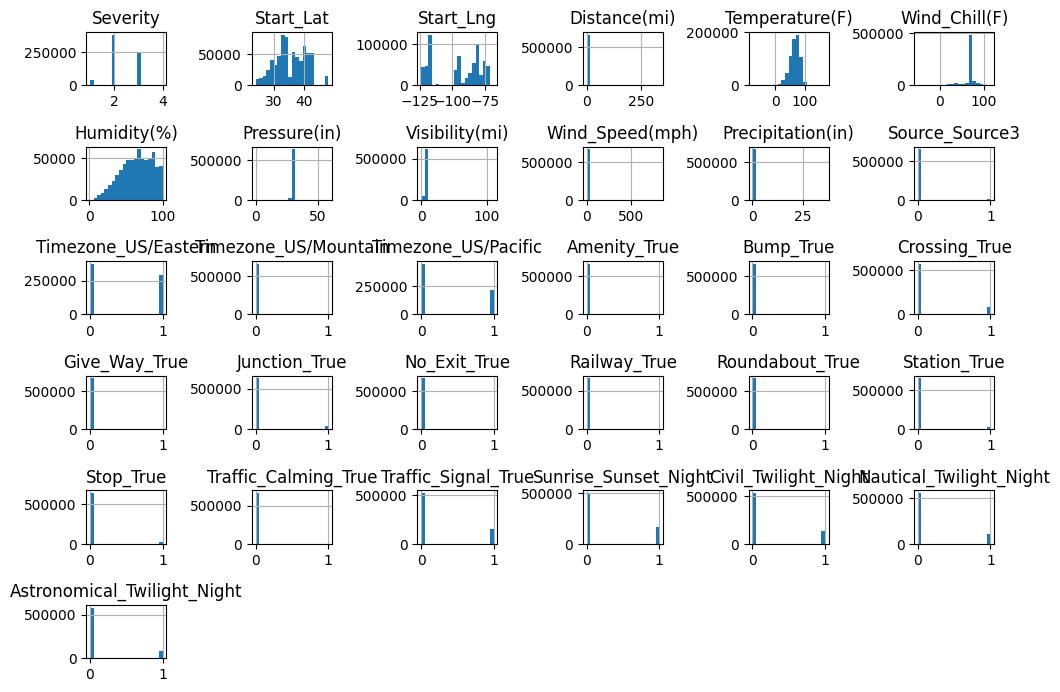

In [13]:
# Plot  after categorical encoding
def plot_encoded_data(data):
    plt.figure(figsize=(10 , 7))
    
    data.hist(bins=20, figsize=(10 , 7))
   
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Call the function to plot histograms for the data after encoding
plot_encoded_data(df)

###  Scaling Data Using StandardScaler

In [15]:
scalar = StandardScaler()

# Scale the data and convert it back to a DataFrame
scaled_data = scalar.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

<Figure size 1000x700 with 0 Axes>

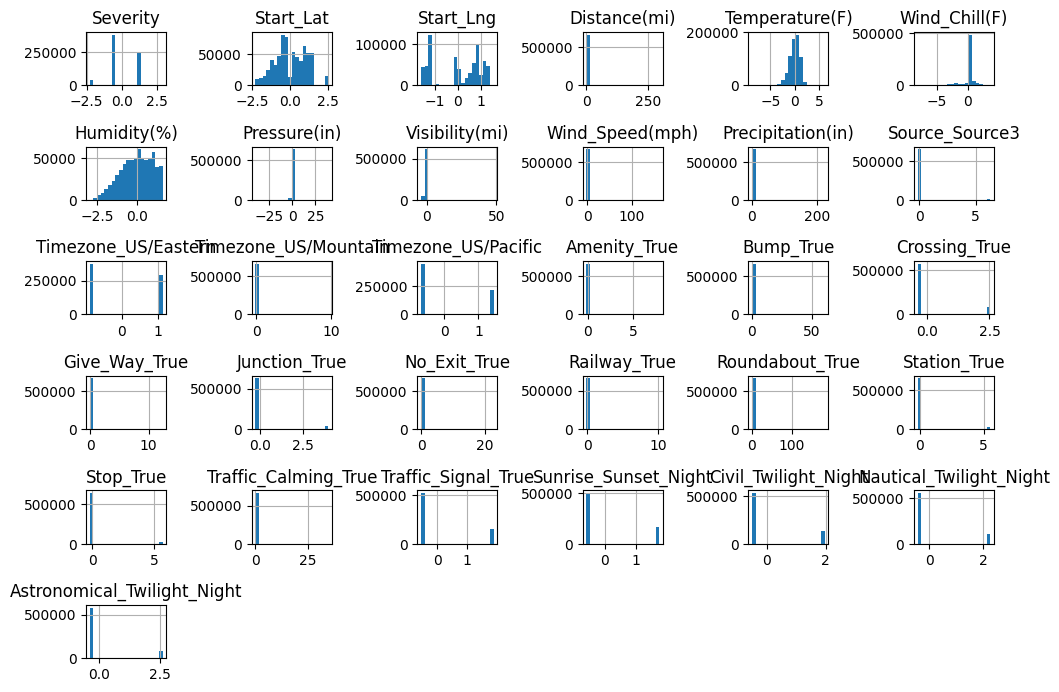

In [16]:
# Plot histograms for each feature in the dataset after categorical encoding
def plot_encoded_data(data):
    plt.figure(figsize=(10 , 7))
    
    data.hist(bins=20, figsize=(10 , 7))
   
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Call the function to plot histograms for the data after encoding
plot_encoded_data(scaled_df) 


 

### Determining Optimal Clusters with K-Means and the Elbow Method 

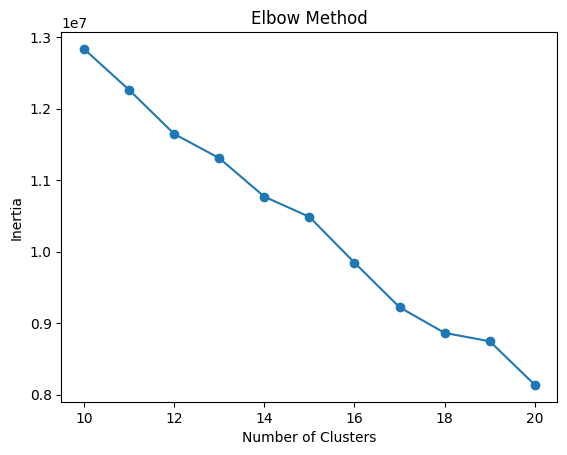

In [18]:
# Find the optimal number of clusters using the Elbow method
inertia = []
for k in range(10, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(10, 21), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [19]:
# Choose the optimal number of clusters and fit KMeans
optimal_k = 16  # Replace with the number of clusters you select from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
df['Cluster'] = clusters

# Save the clustered data
df.to_csv('clustered_dataset.csv', index=False)
print("Clustered dataset saved as 'clustered_dataset.csv'")


Clustered dataset saved as 'clustered_dataset.csv'
